## Assignment 1 - Machine Learning Project
### Project 1: Classify Images of Colon Cancer
##### Group No. 3: Sheikh Abdul Munim (s4076159), Liya Benoy (s4027344)

In [2]:
#importing required libraries
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#importing the data labels (main+extra)
labels_main = pd.read_csv('Image_classification_data\data_labels_mainData.csv')
labels_extra = pd.read_csv('Image_classification_data\data_labels_extraData.csv')
print("labels_main columns:\n", labels_main.head())
print("\nlabels_extra columns:\n", labels_extra.head())

labels_main columns:
    InstanceID  patientID  ImageName cellTypeName  cellType  isCancerous
0       22405          1  22405.png   fibroblast         0            0
1       22406          1  22406.png   fibroblast         0            0
2       22407          1  22407.png   fibroblast         0            0
3       22408          1  22408.png   fibroblast         0            0
4       22409          1  22409.png   fibroblast         0            0

labels_extra columns:
    InstanceID  patientID  ImageName  isCancerous
0       12681         61  12681.png            0
1       12682         61  12682.png            0
2       12683         61  12683.png            0
3       12684         61  12684.png            0
4       12685         61  12685.png            0


In [4]:
#navigating to folder containing colon cell histopathology images
image_folder = 'Image_classification_data\patch_images'
images = os.listdir(image_folder)
print(f"Total Numer of Images: {len(images)}")

Total Numer of Images: 20280


In [5]:
#checking if there are extra images in images folder that are not given in data labels
images_set = set(images)
csv_images_set = set(labels_main['ImageName'].astype(str))  #no '.png' added
print("Images in labels_main but missing from patch_images folder:", csv_images_set - images_set)
print("Images in patch_images folder but missing from labels_main:", images_set - csv_images_set)
#use only images that are listed in the CSV file
images_filtered = [img for img in images if img in csv_images_set]

Images in labels_main but missing from patch_images folder: set()
Images in patch_images folder but missing from labels_main: {'16307.png', '19531.png', '10514.png', '19423.png', '5709.png', '7032.png', '1735.png', '19153.png', '5890.png', '10758.png', '2746.png', '14497.png', '16276.png', '2138.png', '5331.png', '21512.png', '11168.png', '16433.png', '12735.png', '2379.png', '2514.png', '14667.png', '22055.png', '5951.png', '13039.png', '19394.png', '6769.png', '12864.png', '20822.png', '15105.png', '2277.png', '6287.png', '15047.png', '14783.png', '6474.png', '7535.png', '16364.png', '20926.png', '21291.png', '5238.png', '20708.png', '11184.png', '2963.png', '19162.png', '20692.png', '12586.png', '14331.png', '22179.png', '15438.png', '21250.png', '2617.png', '9813.png', '21351.png', '11509.png', '18036.png', '5377.png', '15133.png', '7206.png', '20875.png', '15114.png', '10948.png', '14648.png', '5721.png', '10995.png', '19500.png', '6077.png', '2589.png', '15416.png', '11035.png', 

In [6]:
#defining function to load images
def load_images(image_folder, image_list):
    """Returns a dictionary mapping image names to PIL image objects."""
    images = {}
    for img_name in image_list:
        img_path = os.path.join(image_folder, img_name)
        try:
            with Image.open(img_path) as img:
                images[img_name] = img.copy()  # Copy to keep it after closing
        except Exception as e:
            print(f"Error loading {img_name}: {e}")
    return images
#loading the images
image_objects = load_images(image_folder, labels_main['ImageName'])
#adding a new column 'Image' to labels_main
labels_main['Image'] = labels_main['ImageName'].map(image_objects)
labels_main.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous,Image
0,22405,1,22405.png,fibroblast,0,0,<PIL.Image.Image image mode=RGB size=27x27 at ...
1,22406,1,22406.png,fibroblast,0,0,<PIL.Image.Image image mode=RGB size=27x27 at ...
2,22407,1,22407.png,fibroblast,0,0,<PIL.Image.Image image mode=RGB size=27x27 at ...
3,22408,1,22408.png,fibroblast,0,0,<PIL.Image.Image image mode=RGB size=27x27 at ...
4,22409,1,22409.png,fibroblast,0,0,<PIL.Image.Image image mode=RGB size=27x27 at ...


In [7]:
#grouping by 'cellTypeName' and 'isCancerous', then counting the entries
cell_type_counts = labels_main.groupby(['cellTypeName', 'isCancerous']).size().unstack(fill_value=0)
#renamining the columns for clarity
cell_type_counts.columns = ['Non-Cancerous', 'Cancerous']
cell_type_counts

,Non-Cancerous,Cancerous
cellTypeName,,
epithelial,0,4079
fibroblast,1888,0
inflammatory,2543,0
others,1386,0


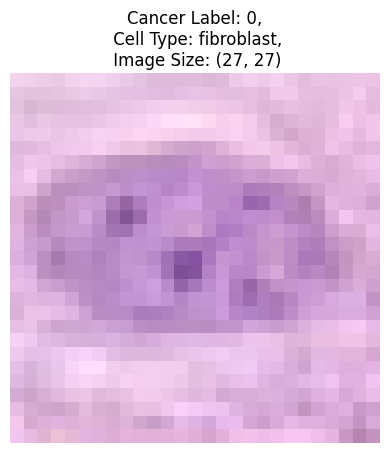

In [8]:
#fetching a single sample (e.g., for index 0)
index = 0
sample = labels_main.iloc[index]
#extracting the image, cancer label, and cell type
img = sample['Image']  # This must be a PIL Image object
cancer_label = sample['isCancerous']
cell_type = sample['cellTypeName']
#displaying the image
if img:
    plt.imshow(img)
    plt.title(f"Cancer Label: {cancer_label},\n Cell Type: {cell_type},\n Image Size: {img.size}")
    plt.axis('off')  #hiding axes
    plt.show()
else:
    print("Error: Image not found.")

### Exploratory Data Analysis (EDA)

In [9]:
#fetching the dimensions of the data
print("Dimensions of labels_main dataframe:", labels_main.shape)
print("\nDescriptive Statistics of labels_main dataframe:")
labels_main.describe()

Dimensions of labels_main dataframe: (9896, 7)

Descriptive Statistics of labels_main dataframe:


,InstanceID,patientID,cellType,isCancerous
count,9896.000000,9896.000000,9896.000000,9896.000000
mean,10193.880154,29.762025,1.501516,0.412187
std,6652.912660,17.486553,0.954867,0.492253
min,1.000000,1.000000,0.000000,0.000000
25%,4135.750000,14.000000,1.000000,0.000000
50%,9279.500000,26.000000,2.000000,0.000000
75%,16821.250000,47.000000,2.000000,1.000000
max,22444.000000,60.000000,3.000000,1.000000


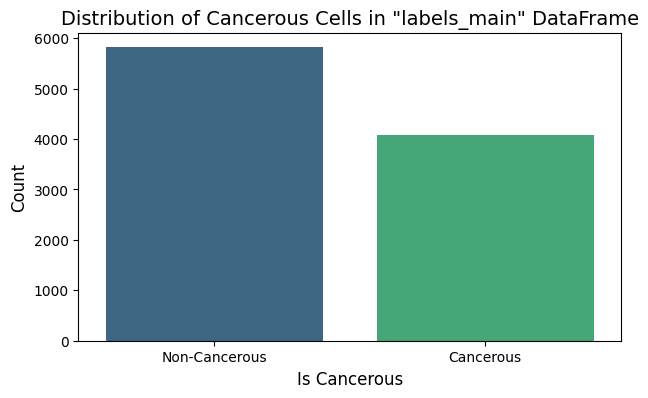

In [10]:
# Plotting the distribution of the 'inCancerous' label
plt.figure(figsize=(7, 4))
sns.countplot(data=labels_main, x='isCancerous', hue="isCancerous", palette='viridis', legend=False)
# Adding titles and labels
plt.title('Distribution of Cancerous Cells in "labels_main" DataFrame', fontsize=14)
plt.xlabel('Is Cancerous', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Non-Cancerous', 'Cancerous'])  # Adjust according to your label values
# Show the plot
plt.show()

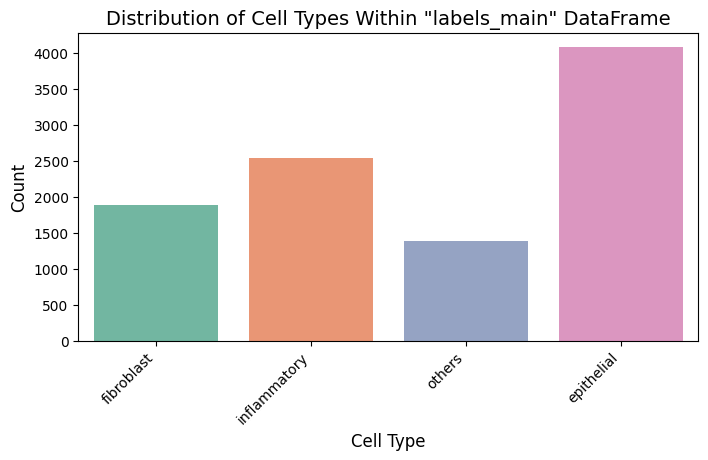

In [11]:
#plotting the distribution of the 'cellTypeName' label
plt.figure(figsize=(8, 4))
sns.countplot(data=labels_main, x='cellTypeName', hue='cellTypeName', palette='Set2', legend=False)
#adding titles and labels
plt.title('Distribution of Cell Types Within "labels_main" DataFrame', fontsize=14)
plt.xlabel('Cell Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()

In [12]:
#checking for missing values in the entire DataFrame
missing_values = labels_main.isnull().sum()
#displaying the columns with missing values
print("Missing values in each column:")
print(missing_values)
#optionally, you can filter columns with missing values only
missing_columns = missing_values[missing_values > 0]
print("\nColumns with missing values:")
print(missing_columns)

Missing values in each column:
InstanceID      0
patientID       0
ImageName       0
cellTypeName    0
cellType        0
isCancerous     0
Image           0
dtype: int64

Columns with missing values:
Series([], dtype: int64)


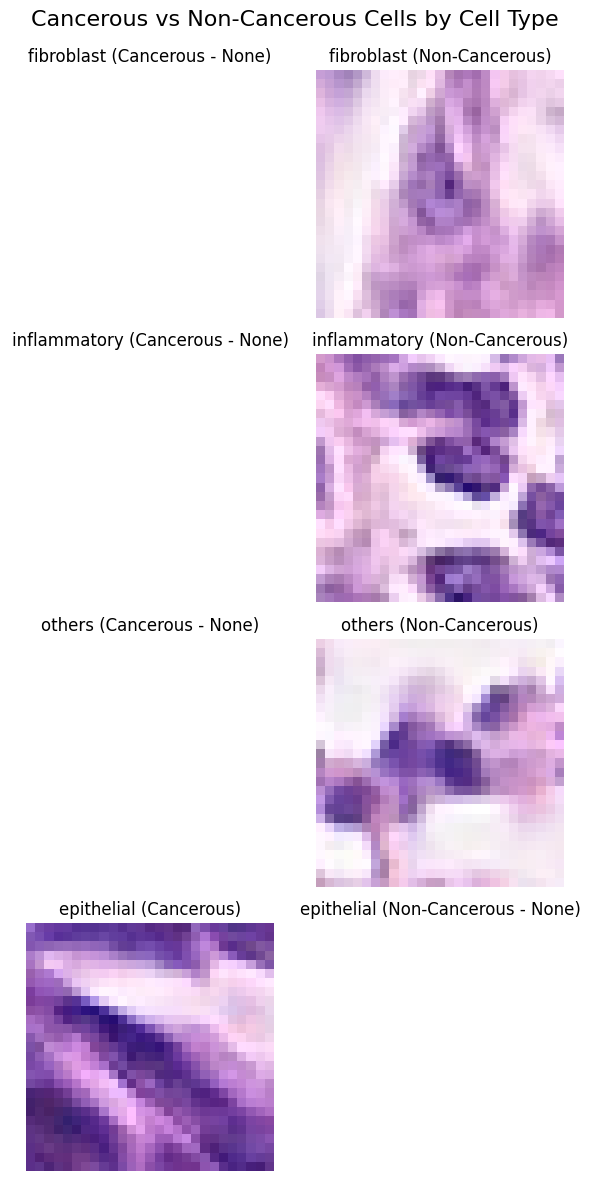

In [13]:
#getting unique cell types
cell_types = labels_main['cellTypeName'].dropna().unique()
#preparing the figure
fig, axes = plt.subplots(len(cell_types), 2, figsize=(6, 3 * len(cell_types)))
#ensure axes is 2D
if len(cell_types) == 1:
    axes = np.expand_dims(axes, axis=0)
#filtering cancerous and non-cancerous data 
for i, cell_type in enumerate(cell_types):
    cancerous_df = labels_main[(labels_main['cellTypeName'] == cell_type) & 
                               (labels_main['isCancerous'] == 1)]
    non_cancerous_df = labels_main[(labels_main['cellTypeName'] == cell_type) & 
                                   (labels_main['isCancerous'] == 0)]
    #plotting cancerous image for cell type
    if not cancerous_df.empty:
        img = cancerous_df.sample(1).iloc[0]['Image']
        axes[i, 0].imshow(img)
        axes[i, 0].set_title(f"{cell_type} (Cancerous)")
    else:
        axes[i, 0].set_title(f"{cell_type} (Cancerous - None)")
    axes[i, 0].axis('off')
    #plotting non-cancerous image for cell type
    if not non_cancerous_df.empty:
        img = non_cancerous_df.sample(1).iloc[0]['Image']
        axes[i, 1].imshow(img)
        axes[i, 1].set_title(f"{cell_type} (Non-Cancerous)")
    else:
        axes[i, 1].set_title(f"{cell_type} (Non-Cancerous - None)")
    axes[i, 1].axis('off')
#plotting comparison images
plt.suptitle('Cancerous vs Non-Cancerous Cells by Cell Type', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

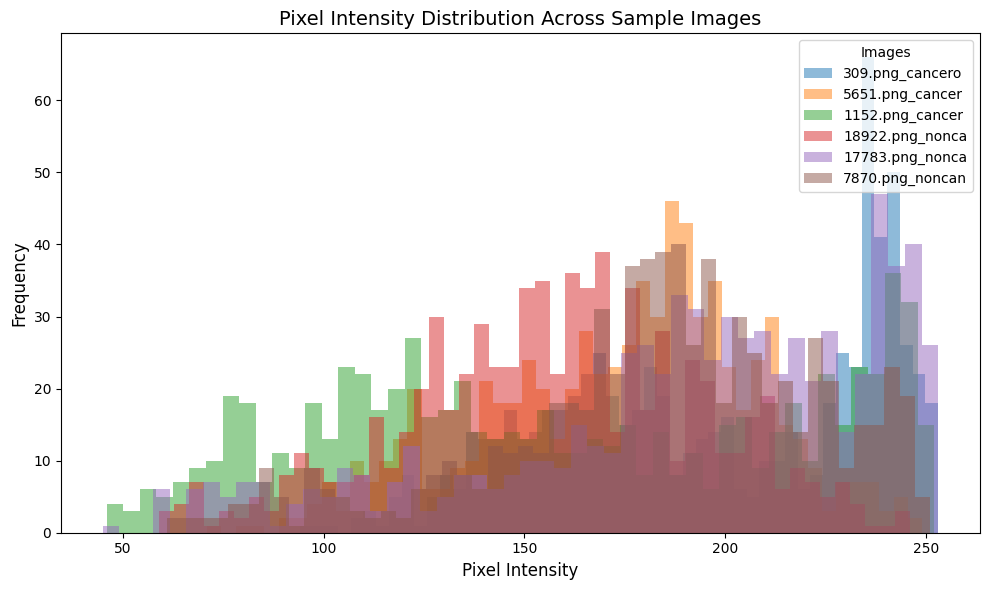

In [14]:
#filtering the main dataframe
cancerous_cells = labels_main[labels_main['isCancerous'] == 1]
non_cancerous_cells = labels_main[labels_main['isCancerous'] == 0]
#defining function to calculate pixel intensity distribution for grayscale images
def plot_pixel_intensity_distribution(images, title="Pixel Intensity Distribution"):
    plt.figure(figsize=(10, 6))
    for idx, (img_name, img) in enumerate(images.items()):
        if img is not None:
            img_gray = img.convert("L")  # Convert image to grayscale
            img_array = np.array(img_gray)
            plt.hist(img_array.flatten(), bins=50, alpha=0.5, label=img_name[:15])  # Truncate long names
    plt.title(title, fontsize=14)
    plt.xlabel('Pixel Intensity', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(title="Images", loc='upper right')
    plt.tight_layout()
    plt.show()
#using a sample of 3 cancerous and 3 non-cancerous images
sample_cancerous_images = cancerous_cells.sample(3, random_state=42)
sample_non_cancerous_images = non_cancerous_cells.sample(3, random_state=42)
#combining the images in a dictionary
sample_images = {}
for idx, row in sample_cancerous_images.iterrows():
    sample_images[f"{row['ImageName']}_cancerous"] = row['Image']
for idx, row in sample_non_cancerous_images.iterrows():
    sample_images[f"{row['ImageName']}_noncancerous"] = row['Image']
#plotting the pixel intensity distribution of the 9 images
plot_pixel_intensity_distribution(sample_images, title="Pixel Intensity Distribution Across Sample Images")

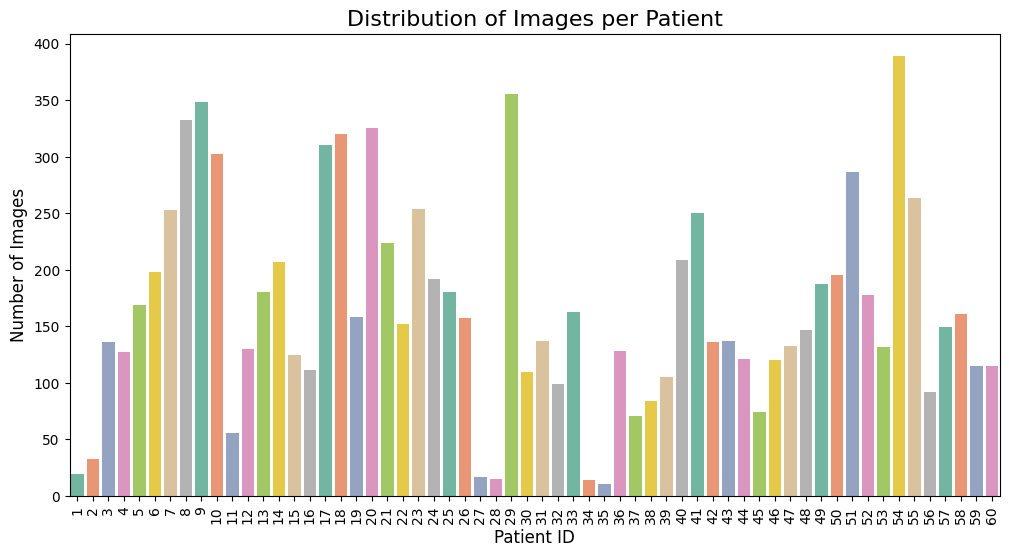

In [15]:
#grouping the data by PatientID and counting the number of images per patient
patient_distribution = labels_main['patientID'].value_counts()
#plotting the patient distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=patient_distribution.index, hue=patient_distribution.index, y=patient_distribution.values, palette="Set2", legend=False)
#adding title and labels
plt.title('Distribution of Images per Patient', fontsize=16)
plt.xlabel('Patient ID', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

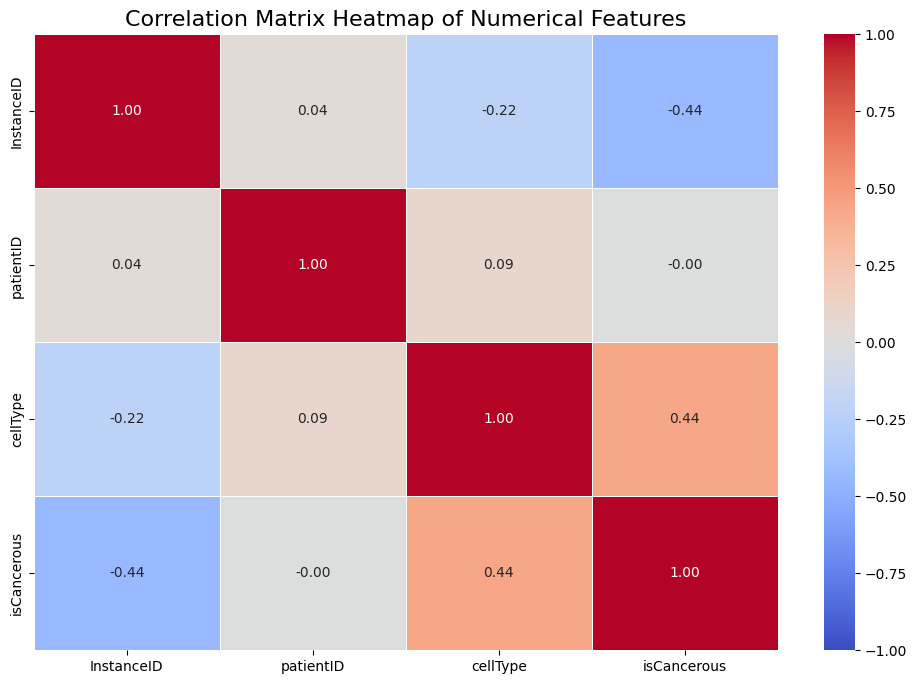

In [16]:
#select only numerical columns
numerical_features = labels_main.select_dtypes(include=['float64', 'int64'])
#calculate the correlation matrix
corr_matrix = numerical_features.corr()
#plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap of Numerical Features', fontsize=16)
plt.show()

In [17]:
#function to classify images as too bright or too dark based on average pixel intensity
def check_image_brightness(images, bright_threshold=200, dark_threshold=50):
    too_bright = []
    too_dark = []  
    for img_name, img in images.items():
        # Convert the image to grayscale
        img_gray = img.convert("L")
        img_array = np.array(img_gray)  # Convert image to numpy array
        #calculate the average pixel intensity
        avg_intensity = img_array.mean()
        #classify image as too bright or too dark
        if avg_intensity > bright_threshold:
            too_bright.append(img_name)
        elif avg_intensity < dark_threshold:
            too_dark.append(img_name)
    return too_bright, too_dark
#check the brightness of the images
too_bright_images, too_dark_images = check_image_brightness(image_objects)
#display the results
print("Too Bright Images:", too_bright_images)
print("Too Dark Images:", too_dark_images)

Too Bright Images: ['22408.png', '22409.png', '22423.png', '19036.png', '19043.png', '19045.png', '19049.png', '19050.png', '19062.png', '19066.png', '18945.png', '18653.png', '132.png', '133.png', '135.png', '153.png', '156.png', '158.png', '161.png', '162.png', '163.png', '164.png', '165.png', '167.png', '168.png', '172.png', '173.png', '175.png', '176.png', '177.png', '178.png', '179.png', '180.png', '181.png', '183.png', '184.png', '187.png', '190.png', '191.png', '192.png', '193.png', '194.png', '195.png', '196.png', '197.png', '198.png', '199.png', '200.png', '201.png', '203.png', '204.png', '205.png', '207.png', '212.png', '213.png', '215.png', '220.png', '221.png', '222.png', '223.png', '227.png', '228.png', '229.png', '230.png', '232.png', '233.png', '234.png', '235.png', '241.png', '242.png', '243.png', '253.png', '254.png', '256.png', '257.png', '260.png', '262.png', '264.png', '270.png', '271.png', '273.png', '274.png', '275.png', '4087.png', '4089.png', '4092.png', '4096.p

### Data Pre-processing

In [18]:

"""    
The following code loads the images, resizes them to 27x27 pixels, normalizes the pixel values, and prepares the labels for CNN training.
The code also combines the labels from the main and extra detasets, however if you do not want to use the extra dataset, you can comment out the lines that load and concate the extra dataset.
The code also handles exceptions while loading images and prints the final shapes of the image dataset and labels.

"""




import numpy as np
from PIL import Image

#list of arrays

X = []
y_isCancerous = []
y_cellType = []

#Combine labels

labels_combined = pd.concat([labels_main,labels_extra], ignore_index=True)

# Build a dictionary for fast lookup
labels_dict = labels_combined.set_index('ImageName').to_dict('index')

# Load and preprocess images
for img_name in images_filtered:

    try:
        img_path = os.path.join(image_folder, img_name)
        img = Image.open(img_path)
        img = img.resize((27, 27))  # Make sure it's 27x27
        img_array = np.array(img)
        
        # Normalize pixel values (0–1)
        img_array = img_array / 255.0

        X.append(img_array)
        
        # Fetch labels
        label_info = labels_dict[img_name]
        y_isCancerous.append(label_info['isCancerous'])
        y_cellType.append(label_info['cellType'])  # This will be used later

    except Exception as e:
        print(f"Error processing {img_name}:{e}")

X = np.array(X)
y_isCancerous = np.array(y_isCancerous)
y_cellType = np.array(y_cellType)

print(f"Final image dataset shape: {X.shape}")
print(f"Labels shape (isCancerous): {y_isCancerous.shape}")
print(f"Labels shape (cellType): {y_cellType.shape}")

Final image dataset shape: (9896, 27, 27, 3)
Labels shape (isCancerous): (9896,)
Labels shape (cellType): (9896,)


In [19]:
# Encoding the labels for cell types
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


# Encode cellType labels into integers
le = LabelEncoder()
y_cellType_encoded = le.fit_transform(y_cellType)

# One-hot encode for CNN multi-class classification
y_cellType_encoded = to_categorical(y_cellType_encoded)

print(f"Cell type classes: {le.classes_}")


Num GPUs Available: 0
Cell type classes: [0. 1. 2. 3.]


In [20]:
#Train-Vlidation-Test Split

from sklearn.model_selection import train_test_split

# Split for Task 1 (isCancerous)
X_train_task1, X_test_task1, y_train_task1, y_test_task1 = train_test_split(X, y_isCancerous, test_size=0.2, random_state=42)

# Split for Task 2 (cellType)
X_train_task2, X_test_task2, y_train_task2, y_test_task2 = train_test_split(X, y_cellType_encoded, test_size=0.2, random_state=42)

print(f"Task 1 Train set size: {X_train_task1.shape}")
print(f"Task 2 Train set size: {X_train_task2.shape}")


Task 1 Train set size: (7916, 27, 27, 3)
Task 2 Train set size: (7916, 27, 27, 3)


### Building Baseline Models

#### Baseline Model 1: CNN

In [21]:
# Binary Classification Model for Task 1 (isCancerous)

"""Input shape: 27x27x3 (for RGB images)
Output shape: 1 (binary classification)"""

#Model Architecture

import tensorflow as tf
from tensorflow.keras import layers, models

# Define CNN model
cnn_task1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(27, 27, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # 1 neuron for binary output
])

# Compile the model
cnn_task1.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Model summary
cnn_task1.summary()




c:\Users\liyab\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       409,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429,121 (1.64 MB)

 Trainable params: 429,121 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
#Train the Model
# Training
history_task1 = cnn_task1.fit(X_train_task1, y_train_task1,
                              epochs=30,
                              batch_size=32,
                              validation_split=0.2)  # 20% of train set used for validation



Epoch 1/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7161 - loss: 0.5295 - val_accuracy: 0.8529 - val_loss: 0.3322
Epoch 2/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8675 - loss: 0.3274 - val_accuracy: 0.8668 - val_loss: 0.3100
Epoch 3/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8684 - loss: 0.3008 - val_accuracy: 0.8775 - val_loss: 0.2904
Epoch 4/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8919 - loss: 0.2734 - val_accuracy: 0.8624 - val_loss: 0.3371
Epoch 5/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8778 - loss: 0.2916 - val_accuracy: 0.8801 - val_loss: 0.2823
Epoch 6/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9012 - loss: 0.2431 - val_accuracy: 0.8542 - val_loss: 0.3515
Epoch 7/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8847 - loss: 0.2677 - val_accuracy: 0.8870 - val_loss: 0.2852
Epoch 8/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8985 - loss: 0.2496 - val_accuracy: 0.

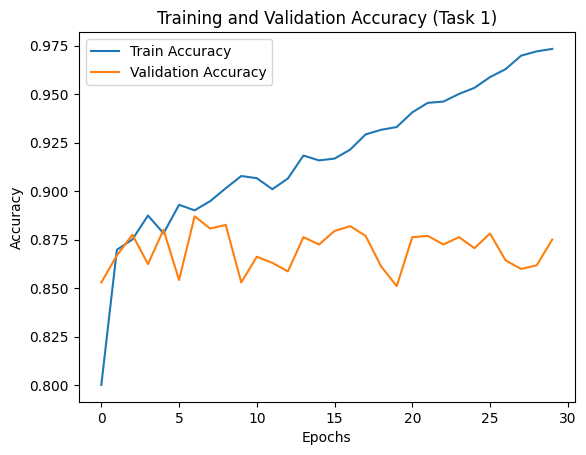

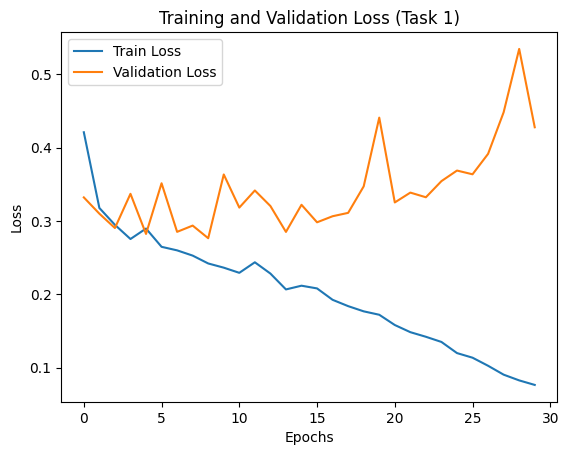

In [23]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.plot(history_task1.history['accuracy'], label='Train Accuracy')
plt.plot(history_task1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Task 1)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_task1.history['loss'], label='Train Loss')
plt.plot(history_task1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Task 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [24]:
# Evaluate
test_loss, test_accuracy = cnn_task1.evaluate(X_test_task1, y_test_task1)
print(f"Test Accuracy (Task 1 - isCancerous): {test_accuracy:.4f}")


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8835 - loss: 0.3677
Test Accuracy (Task 1 - isCancerous): 0.8833


In [25]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict
y_pred_task1 = (cnn_task1.predict(X_test_task1) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test_task1, y_pred_task1)
print("Confusion Matrix:\n", cm)

# Classification report
print(classification_report(y_test_task1, y_pred_task1))


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Confusion Matrix:
 [[1062  124]
 [ 107  687]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1186
           1       0.85      0.87      0.86       794

    accuracy                           0.88      1980
   macro avg       0.88      0.88      0.88      1980
weighted avg       0.88      0.88      0.88      1980



#### Baseline Model 2: Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
from PIL import Image
import os


In [27]:
# Function to extract features (flatten the image)
def extract_features(img, size=(27, 27)):
    img_resized = img.convert("L").resize(size)  # Convert to grayscale and resize
    return np.array(img_resized).flatten()  # Flatten to a 1D vector

# Prepare features (flattened images) and labels
X = []
y_cancerous = []
y_celltype = []

for _, row in labels_main.iterrows():
    img = row['Image']  # PIL Image object from 'Image' column
    X.append(extract_features(img))  # Extract features from image
    y_cancerous.append(row["isCancerous"])  # Target: isCancerous
    y_celltype.append(row["cellTypeName"])  # Target: cellTypeName

X = np.array(X)
y_cancerous = np.array(y_cancerous)
y_celltype = np.array(y_celltype)

# Train-Test Split (80% training, 20% test data)
X_train, X_test, y_c_train, y_c_test, y_t_train, y_t_test = train_test_split(
    X, y_cancerous, y_celltype, test_size=0.2, random_state=42, stratify=y_cancerous
)

In [28]:
# Train Random Forest for cancerous classification (isCancerous)
rf_cancerous = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cancerous.fit(X_train, y_c_train)

# Predict on test data
y_c_pred = rf_cancerous.predict(X_test)

# Evaluate the cancerous classification model
print("Cancerous Classification (isCancerous) Results:")
print("Accuracy: ", accuracy_score(y_c_test, y_c_pred))
print("Classification Report:")
print(classification_report(y_c_test, y_c_pred))

# Confusion Matrix for cancerous classification
cm_cancerous = confusion_matrix(y_c_test, y_c_pred)

Cancerous Classification (isCancerous) Results:
Accuracy:  0.7954545454545454
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1164
           1       0.78      0.70      0.74       816

    accuracy                           0.80      1980
   macro avg       0.79      0.78      0.79      1980
weighted avg       0.79      0.80      0.79      1980



In [29]:
# Encode the cell type labels to numeric values
le = LabelEncoder()
y_t_train_encoded = le.fit_transform(y_t_train)
y_t_test_encoded = le.transform(y_t_test)

# Train Random Forest for cell-type classification
rf_celltype = RandomForestClassifier(n_estimators=100, random_state=42)
rf_celltype.fit(X_train, y_t_train_encoded)

# Predict on test data for cell type
y_t_pred = rf_celltype.predict(X_test)

# Evaluate the cell-type classification model
print("\nCell-Type Classification Results:")
print("Accuracy: ", accuracy_score(y_t_test_encoded, y_t_pred))
print("Classification Report:")
print(classification_report(y_t_test_encoded, y_t_pred))

# Confusion Matrix for cell type classification
cm_celltype = confusion_matrix(y_t_test_encoded, y_t_pred)


Cell-Type Classification Results:
Accuracy:  0.6297979797979798
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.89      0.75       816
           1       0.57      0.40      0.47       364
           2       0.61      0.76      0.68       495
           3       0.67      0.01      0.03       305

    accuracy                           0.63      1980
   macro avg       0.62      0.51      0.48      1980
weighted avg       0.63      0.63      0.57      1980



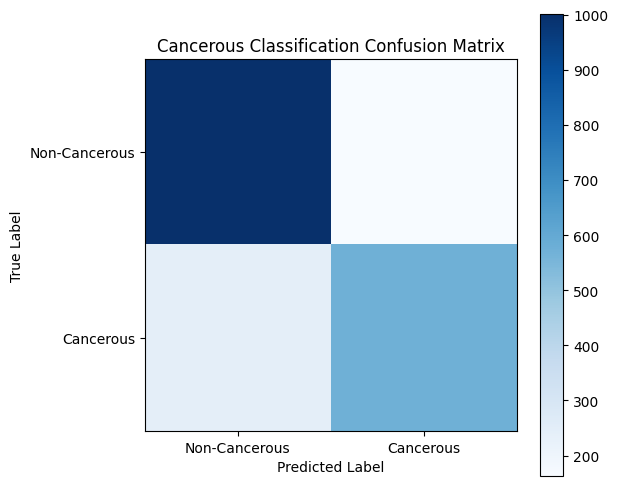

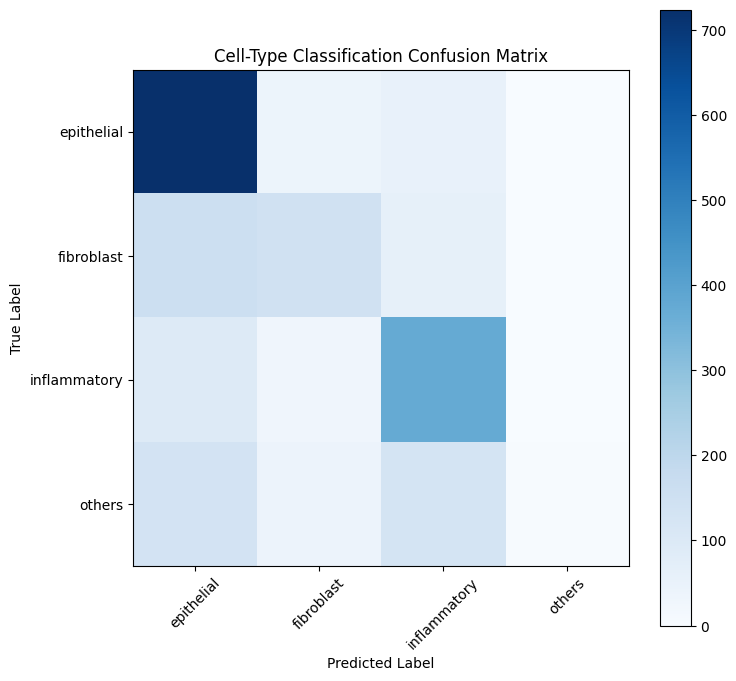

In [30]:
import matplotlib.pyplot as plt

# Plotting Confusion Matrix for cancerous classification
plt.figure(figsize=(6, 6))
plt.imshow(cm_cancerous, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Cancerous Classification Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-Cancerous', 'Cancerous'])
plt.yticks(tick_marks, ['Non-Cancerous', 'Cancerous'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting Confusion Matrix for cell type classification
plt.figure(figsize=(8, 8))
plt.imshow(cm_celltype, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Cell-Type Classification Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(le.classes_))
plt.xticks(tick_marks, le.classes_, rotation=45)
plt.yticks(tick_marks, le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Baseline Model 3: custom CNN with residual blocks

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers, models, callbacks, metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
from tensorflow.keras import backend as K

# Set image size for ResNet101
IMG_SIZE = (224, 224)

# -------------------
# Image Preprocessing
# -------------------
def preprocess_images(df, image_column, target_size=IMG_SIZE):
    X = []
    for img in df[image_column]:
        img_resized = img.resize(target_size)
        img_array = img_to_array(img_resized)
        img_array = img_array / 255.0  # Normalize to [0, 1]
        X.append(img_array)
    return np.array(X)

X = preprocess_images(labels_main, 'Image', target_size=IMG_SIZE)
y_cancerous = labels_main['isCancerous'].values
y_celltype = labels_main['cellTypeName'].values

In [38]:
# -------------------
# Train-Test Split
# -------------------
X_train, X_test, y_c_train, y_c_test, y_t_train, y_t_test = train_test_split(
    X, y_cancerous, y_celltype, test_size=0.2, random_state=42, stratify=y_cancerous
)

In [39]:
# -------------------
# Residual Block
# -------------------
def residual_block(x, filters, kernel_size=(3, 3), strides=(1, 1)):
    shortcut = x
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Conv2D(filters, kernel_size, strides=(1, 1), padding="same")(x)
    x = layers.BatchNormalization()(x)

    if shortcut.shape[-1] != filters or strides != (1, 1):
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding="same")(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.add([x, shortcut])
    x = layers.Activation("relu")(x)
    return x

In [40]:
# -------------------
# Build ResNet-like Model
# -------------------
def build_resnet101_model(input_shape=(224, 224, 3)):
    input_layer = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding="same")(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding="same")(x)

    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 128, strides=(2, 2))
    x = residual_block(x, 128)
    x = residual_block(x, 256, strides=(2, 2))
    x = residual_block(x, 256)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.4)(x)
    output_layer = layers.Dense(1, activation="sigmoid")(x)

    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

model_cancerous = build_resnet101_model()

In [41]:
# -------------------
# Focal Loss
# -------------------
def focal_loss(gamma=2., alpha=0.25):
    def loss(y_true, y_pred):
        y_true = K.cast(y_true, tf.float32)
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        pt = tf.where(K.equal(y_true, 1), y_pred, 1 - y_pred)
        return -K.mean(alpha * K.pow(1. - pt, gamma) * K.log(pt))
    return loss

# -------------------
# Compile Model
# -------------------
model_cancerous.compile(
    optimizer="adam",
    loss=focal_loss(),
    metrics=[metrics.BinaryAccuracy(), metrics.Precision(), metrics.Recall()]
)

In [42]:
# -------------------
# Class Weights
# -------------------
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_c_train),
                                     y=y_c_train)
class_weights = dict(enumerate(class_weights))

# -------------------
# Data Augmentation
# -------------------
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)
train_generator = datagen.flow(X_train, y_c_train, batch_size=32)

In [43]:
# -------------------
# Callbacks
# -------------------
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# -------------------
# Train Model
# -------------------
history_cancerous = model_cancerous.fit(
    train_generator,
    validation_data=(X_test, y_c_test),
    epochs=30,
    class_weight=class_weights,
    callbacks=[early_stop]
)

# -------------------
# Model Summary (Optional)
# -------------------
model_cancerous.summary()

Epoch 1/30


c:\Users\liyab\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


248/248 ━━━━━━━━━━━━━━━━━━━━ 991s 4s/step - binary_accuracy: 0.8197 - loss: 0.0312 - precision: 0.7739 - recall: 0.7901 - val_binary_accuracy: 0.4136 - val_loss: 0.1330 - val_precision: 0.4127 - val_recall: 1.0000
Epoch 2/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 602s 2s/step - binary_accuracy: 0.8634 - loss: 0.0206 - precision: 0.8116 - recall: 0.8685 - val_binary_accuracy: 0.4970 - val_loss: 0.1175 - val_precision: 0.4503 - val_recall: 0.9988
Epoch 3/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 586s 2s/step - binary_accuracy: 0.8735 - loss: 0.0195 - precision: 0.8434 - recall: 0.8554 - val_binary_accuracy: 0.7131 - val_loss: 0.0526 - val_precision: 0.5906 - val_recall: 0.9902
Epoch 4/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 638s 3s/step - binary_accuracy: 0.8858 - loss: 0.0195 - precision: 0.8654 - recall: 0.8534 - val_binary_accuracy: 0.6217 - val_loss: 0.1523 - val_precision: 0.9718 - val_recall: 0.0846
Epoch 5/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 720s 3s/step - binary_accuracy: 0.8926 - loss: 0.0184 - precision: 0.87

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 112, 112,  │      9,472 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_17[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_13       │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 56, 56,    │          0 │ activation_13[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 56, 56,    │     36,928 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_18[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_14       │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 56, 56,    │     36,928 │ activation_14[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_19[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_15       │ (None, 56, 56,    │          0 │ add_6[0][0]       │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 56, 56,    │     36,928 │ activation_15[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_20[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_16       │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 56, 56,    │     36,928 │ activation_16[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_21[0][0] 

 Total params: 8,458,629 (32.27 MB)

 Trainable params: 2,818,049 (10.75 MB)

 Non-trainable params: 4,480 (17.50 KB)

 Optimizer params: 5,636,100 (21.50 MB)

In [44]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_prob = model_cancerous.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy: ", accuracy_score(y_c_test, y_pred))
print("Classification Report:\n", classification_report(y_c_test, y_pred))

62/62 ━━━━━━━━━━━━━━━━━━━━ 31s 482ms/step
Accuracy:  0.8252525252525252
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.85      1164
           1       0.81      0.75      0.78       816

    accuracy                           0.83      1980
   macro avg       0.82      0.81      0.82      1980
weighted avg       0.82      0.83      0.82      1980

